# Reto Herramientas Computacionales

### Objetivo SMART: 

#### Determinar el impacto medi√°tico que tienen las noticias relacionadas al COVID-19 en las discusi√≥n en Twitter



In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


our_data = pd.read_csv("Tweets_AC.csv")
our_data

user_name               user_location  \
0                       ·èâ·é•‚òª’¨ÍÇÖœÆ                  astroworld   
1                Tom Basile üá∫üá∏                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ‚è≥                   üá®üá¶ Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...   
4       üñäÔ∏èOfficial Twitter handle of Department of Inf...   
...                                                   ...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea   
179104  When your cat has more baking soda than Ninja ...   
179105  ‚öíÔ∏è The Architects of Free Trade ‚öíÔ∏è Really Did ...   
179106  Global UX UI Visual Designer. StoryTeller, Mus...   
179107  TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...   

               user_created  user_followers  user_friends  user_favourites  \
0       2017-05-26 05:46:42             624           950            18775   
1       2009-04-16 20:06:23            2253          1677               24   
2       2009-02-28 18:57:41            9275          9525             7254   
3       2019-03-07 01:45:06             197           987             1488   
4       2017-02-12 06:45:15          101009           168              101   
...                     ...             ...           ...              ...   
179103  2013-12-30 18:59:19             412          1609             1062   
179104  2011-12-21 04:41:30             150           182             7295   
179105  2016-07-13 17:21:59            1623          2160            98000   
179106  2009-10-27 17:43:13            1338          1111                0   
179107  2018-04-14 17:30:07              97          1697              566   

        user_verified                 date  \
0               False  2020-07-25 12:27:21   
1                True  2020-07-25 12:27:17   
2               False  2020-07-25 12:27:14   
3               False  2020-07-25 12:27:10   
4               False  2020-07-25 12:27:08   
...               ...                  ...   
179103          False  2020-08-29 19:44:21   
179104          False  2020-08-29 19:44:16   
179105          False  2020-08-29 19:44:15   
179106          False  2020-08-29 19:44:14   
179107          False  2020-08-29 19:44:08   

                                                     text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                 hashtags               source  is_retweet  
0                                     NaN   Twitter for iPhone       False  
1                                     NaN  Twitter for Android       False  
2                             ['COVID19']  Twitter f

In [13]:
print("Cantidad de objetos (filas):", len(our_data.index))
print("Cantidad de variables (columnas):", len(our_data.columns))
print("Total de datos:", len(our_data.index) * len(our_data.columns))

Cantidad de objetos (filas): 179108
Cantidad de variables (columnas): 13
Total de datos: 2328404


Como se puede observar, en la base de datos actualizada con los tweets respecto al Covid-19, hay un total de 2,328,404 datos; los cuales corresponden a 179,108 tweets realizados por usuarios en la red social.

In [14]:
print("Variables y su tipo de datos:")
variables = our_data.dtypes
variables

Variables y su tipo de datos:


user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

Aqu√≠ se pueden observar las variables existentes en la base de datos acompa√±ada del tipo de dato que contiene cada una, y cabe resaltar que la √∫ltima fila que arroja "dtype: object" no est√° en el documento, apareci√≥ por el comando utilizado para obtener la informaci√≥n. Las variables que contienen "object" significa que contienen una cadena de caracteres alfanum√©ricos o incluso caracteres especiales; las que aparecen como "int64" contienen solo n√∫meros enteros; y las que aparecen con la leyenda "bool" significa que solo tienen como dato verdadero o falso. A continuaci√≥n se dar√° una breve descripci√≥n de lo que representa cada una de las variables. 
-user_name: El nombre de usuario que tiene asignado la cuenta de twitter. 
-user_location: El lugar geogr√°fico donde se encontraba la persona al momento de publicar el tweet. 
-user_description: Alguna informaci√≥n adicional que el usuario agreg√≥ a su perfil. 
-user_created: La fecha y la hora en la que fue creada esa cuenta de twitter. 
-user_followers: La cantidad de seguidores que tiene cada usuario en su cuenta. 
-user_friends: La cantidad de amigos que la persona tiene en su cuenta. 
-user_favourites: El n√∫mero de personas que cada usuario tiene marcado como favoritos. 
-user_verified: S√≥lo aparece verdadero si el usuario tiene su cuenta verificada. 
-date: La fecha y la hora en la que cada usuario public√≥ su respectivo tweet. 
-text: Muestra el contenido del tweet de cada usuario. 
-hashtags: Aparece si el usuario utiliz√≥ alg√∫n hashtag al realizar su publicaci√≥n. 
-source: Revela la fuente digital donde se utiliz√≥ twitter al realizar el tweet. 
-is_retweet: S√≥lo es verdadero si el tweet de cada usuario fue compartido por m√°s personas.

In [15]:
numericData = our_data.select_dtypes(include = ["int"])
numericData.describe()

user_followers   user_friends  user_favourites
count    1.791080e+05  179108.000000     1.791080e+05
mean     1.090555e+05    2121.701566     1.444411e+04
std      8.414670e+05    9162.553072     4.452270e+04
min      0.000000e+00       0.000000     0.000000e+00
25%      1.720000e+02     148.000000     2.060000e+02
50%      9.920000e+02     542.000000     1.791000e+03
75%      5.284000e+03    1725.250000     9.388000e+03
max      4.944256e+07  497363.000000     2.047197e+06

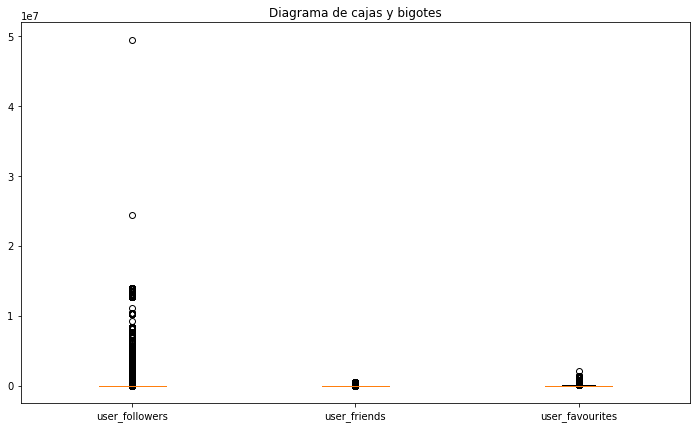

In [16]:
fig = plt.figure(figsize = (12,7))
plt.boxplot(numericData, labels = numericData.columns)
plt.title("Diagrama de cajas y bigotes")
plt.show()

In [17]:
numericData.corr(method = "pearson")

user_followers  user_friends  user_favourites
user_followers         1.000000      -0.00358        -0.029218
user_friends          -0.003580       1.00000         0.201050
user_favourites       -0.029218       0.20105         1.000000

<AxesSubplot:>

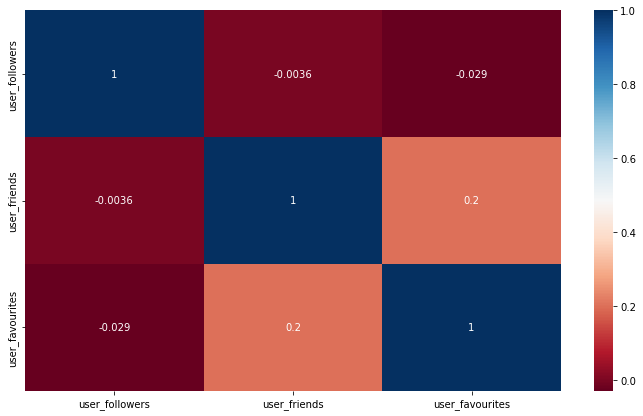

In [18]:
fig = plt.figure(figsize = (12,7))
sns.heatmap(numericData.corr(), cmap = "RdBu", annot = True)

In [19]:
our_data.drop(['is_retweet',"source","user_created"],inplace = True, axis = 1)
our_data

user_name               user_location  \
0                       ·èâ·é•‚òª’¨ÍÇÖœÆ                  astroworld   
1                Tom Basile üá∫üá∏                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ‚è≥                   üá®üá¶ Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  user_followers  \
0       wednesday addams as a disney princess keepin i...             624   
1       Husband, Father, Columnist & Commentator. Auth...            2253   
2       #Christian #Catholic #Conservative #Reagan #Re...            9275   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...             197   
4       üñäÔ∏èOfficial Twitter handle of Department of Inf...          101009   
...                                                   ...             ...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea             412   
179104  When your cat has more baking soda than Ninja ...             150   
179105  ‚öíÔ∏è The Architects of Free Trade ‚öíÔ∏è Really Did ...            1623   
179106  Global UX UI Visual Designer. StoryTeller, Mus...            1338   
179107  TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...              97   

        user_friends  user_favourites  user_verified                 date  \
0                950            18775          False  2020-07-25 12:27:21   
1               1677               24           True  2020-07-25 12:27:17   
2               9525             7254          False  2020-07-25 12:27:14   
3                987             1488          False  2020-07-25 12:27:10   
4                168              101          False  2020-07-25 12:27:08   
...              ...              ...            ...                  ...   
179103          1609             1062          False  2020-08-29 19:44:21   
179104           182             7295          False  2020-08-29 19:44:16   
179105          2160            98000          False  2020-08-29 19:44:15   
179106          1111                0          False  2020-08-29 19:44:14   
179107          1697              566          False  2020-08-29 19:44:08   

                                                     text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                 hashtags  
0                                     NaN  
1                                     NaN  
2                             ['COVID19']  
3                             ['COVID19']  
4       ['CoronaVirusUpdates', 'COVID19']  
...                                   ...  
179103                      ['WearAMask']  
179104                        ['COVID19']  
179105                                NaN  
179106                        ['COVID19']  
179107                                NaN  

[179108 rows x 10 columns]

In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.corpus import subjectivity
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

%matplotlib inline

def text_cleaner(text) :
    text = re.sub(r"\n"," ",text)
    text = re.sub(r"\t"," ",text)
    text = re.sub(r"\r"," ",text)
    text = re.sub(r"(@)|(#)|(RT[\s]+)|(https?:\/\/\S+)|([^a-zA-Z0-9 -])", "", text)
    text = text.strip(" ")
    return text


def hashtag_collector(text) :
    list_of_hashtags = re.findall(r"#[A-Za-z0-9\-\.\_]+",text,re.DOTALL)
    if(list_of_hashtags != None) :
        list_of_hashtags = [word.replace('#', '') for word in list_of_hashtags]
        list_of_hashtags = [word.replace('.', '') for word in list_of_hashtags]
        list_of_hashtags = [word.upper() for word in list_of_hashtags]
    return list_of_hashtags

# at collector
# finds all mentions and puts them into a list
# removes @ symbols to clean up list
def at_collector(text) :
    list_of_ats = re.findall(r"@[A-Za-z0-9\-\.\_]+",text,re.DOTALL)
    if(list_of_ats != None) :
        list_of_ats = [name.replace('@', '') for name in list_of_ats]
    return list_of_ats


# wordClouder
# creates a word cloud
def wordClouder(string_column):
    Words = ''.join([words for words in string_column])
    wordcloud = WordCloud(width = 1000, height = 600, random_state = 10, max_font_size = 120)
    wordcloud.generate(Words)
    plt.style.use('fivethirtyeight')
    plt.figure(figsize = (20,28))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis('off')
    plt.show()

In [21]:
# makes new column titled hashtags_in_tweets
# by applying hashtag_collector function to the text column
our_data["hashtags_in_tweets"] = our_data["text"].apply(hashtag_collector)
our_data

user_name               user_location  \
0                       ·èâ·é•‚òª’¨ÍÇÖœÆ                  astroworld   
1                Tom Basile üá∫üá∏                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ‚è≥                   üá®üá¶ Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  user_followers  \
0       wednesday addams as a disney princess keepin i...             624   
1       Husband, Father, Columnist & Commentator. Auth...            2253   
2       #Christian #Catholic #Conservative #Reagan #Re...            9275   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...             197   
4       üñäÔ∏èOfficial Twitter handle of Department of Inf...          101009   
...                                                   ...             ...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea             412   
179104  When your cat has more baking soda than Ninja ...             150   
179105  ‚öíÔ∏è The Architects of Free Trade ‚öíÔ∏è Really Did ...            1623   
179106  Global UX UI Visual Designer. StoryTeller, Mus...            1338   
179107  TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...              97   

        user_friends  user_favourites  user_verified                 date  \
0                950            18775          False  2020-07-25 12:27:21   
1               1677               24           True  2020-07-25 12:27:17   
2               9525             7254          False  2020-07-25 12:27:14   
3                987             1488          False  2020-07-25 12:27:10   
4                168              101          False  2020-07-25 12:27:08   
...              ...              ...            ...                  ...   
179103          1609             1062          False  2020-08-29 19:44:21   
179104           182             7295          False  2020-08-29 19:44:16   
179105          2160            98000          False  2020-08-29 19:44:15   
179106          1111                0          False  2020-08-29 19:44:14   
179107          1697              566          False  2020-08-29 19:44:08   

                                                     text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                 hashtags             hashtags_in_tweets  
0                                     NaN                             []  
1                                     NaN                             []  
2                             ['COVID19']                      [COVID19]  
3                             ['COVID19']                      [COVID19]  
4       ['CoronaVirusUpdates', 'COVID19']  [CORONAVIRUSUPDATES, COVID19]  
...                                   ...                            ...  
179103                      ['WearAMask']                    [WEARAMASK]  
179104                        ['COVID19']               

In [22]:
our_data["ats_in_tweets"] = our_data["text"].apply(at_collector)
our_data

user_name               user_location  \
0                       ·èâ·é•‚òª’¨ÍÇÖœÆ                  astroworld   
1                Tom Basile üá∫üá∏                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ‚è≥                   üá®üá¶ Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  user_followers  \
0       wednesday addams as a disney princess keepin i...             624   
1       Husband, Father, Columnist & Commentator. Auth...            2253   
2       #Christian #Catholic #Conservative #Reagan #Re...            9275   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...             197   
4       üñäÔ∏èOfficial Twitter handle of Department of Inf...          101009   
...                                                   ...             ...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea             412   
179104  When your cat has more baking soda than Ninja ...             150   
179105  ‚öíÔ∏è The Architects of Free Trade ‚öíÔ∏è Really Did ...            1623   
179106  Global UX UI Visual Designer. StoryTeller, Mus...            1338   
179107  TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...              97   

        user_friends  user_favourites  user_verified                 date  \
0                950            18775          False  2020-07-25 12:27:21   
1               1677               24           True  2020-07-25 12:27:17   
2               9525             7254          False  2020-07-25 12:27:14   
3                987             1488          False  2020-07-25 12:27:10   
4                168              101          False  2020-07-25 12:27:08   
...              ...              ...            ...                  ...   
179103          1609             1062          False  2020-08-29 19:44:21   
179104           182             7295          False  2020-08-29 19:44:16   
179105          2160            98000          False  2020-08-29 19:44:15   
179106          1111                0          False  2020-08-29 19:44:14   
179107          1697              566          False  2020-08-29 19:44:08   

                                                     text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                 hashtags             hashtags_in_tweets  \
0                                     NaN                             []   
1                                     NaN                             []   
2                             ['COVID19']                      [COVID19]   
3                             ['COVID19']                      [COVID19]   
4       ['CoronaVirusUpdates', 'COVID19']  [CORONAVIRUSUPDATES, COVID19]   
...                                   ...                            ...   
179103                      ['WearAMask']                    [WEARAMASK]   
179104                        ['COVID19']       

In [23]:
our_data["text"] = our_data["text"].apply(text_cleaner)
our_data

user_name               user_location  \
0                       ·èâ·é•‚òª’¨ÍÇÖœÆ                  astroworld   
1                Tom Basile üá∫üá∏                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ‚è≥                   üá®üá¶ Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  user_followers  \
0       wednesday addams as a disney princess keepin i...             624   
1       Husband, Father, Columnist & Commentator. Auth...            2253   
2       #Christian #Catholic #Conservative #Reagan #Re...            9275   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...             197   
4       üñäÔ∏èOfficial Twitter handle of Department of Inf...          101009   
...                                                   ...             ...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea             412   
179104  When your cat has more baking soda than Ninja ...             150   
179105  ‚öíÔ∏è The Architects of Free Trade ‚öíÔ∏è Really Did ...            1623   
179106  Global UX UI Visual Designer. StoryTeller, Mus...            1338   
179107  TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...              97   

        user_friends  user_favourites  user_verified                 date  \
0                950            18775          False  2020-07-25 12:27:21   
1               1677               24           True  2020-07-25 12:27:17   
2               9525             7254          False  2020-07-25 12:27:14   
3                987             1488          False  2020-07-25 12:27:10   
4                168              101          False  2020-07-25 12:27:08   
...              ...              ...            ...                  ...   
179103          1609             1062          False  2020-08-29 19:44:21   
179104           182             7295          False  2020-08-29 19:44:16   
179105          2160            98000          False  2020-08-29 19:44:15   
179106          1111                0          False  2020-08-29 19:44:14   
179107          1697              566          False  2020-08-29 19:44:08   

                                                     text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey Yankees YankeesPR and MLB - wouldnt it hav...   
2       diane3443 wdunlap realDonaldTrump Trump never ...   
3       brookbanktv The one gift COVID19 has give me i...   
4       25 July  Media Bulletin on Novel CoronaVirusUp...   
...                                                   ...   
179103  Thanks IamOhmai for nominating me for the WHO ...   
179104              2020 The year of insanity Lol COVID19   
179105  CTVNews A powerful painting by Juan Lucena Its...   
179106  More than 1200 students test positive for COVI...   
179107  I stop when I see a Stop  SABCNews IzindabaNew...   

                                 hashtags             hashtags_in_tweets  \
0                                     NaN                             []   
1                                     NaN                             []   
2                             ['COVID19']                      [COVID19]   
3                             ['COVID19']                      [COVID19]   
4       ['CoronaVirusUpdates', 'COVID19']  [CORONAVIRUSUPDATES, COVID19]   
...                                   ...                            ...   
179103                      ['WearAMask']                    [WEARAMASK]   
179104                        ['COVID19']       

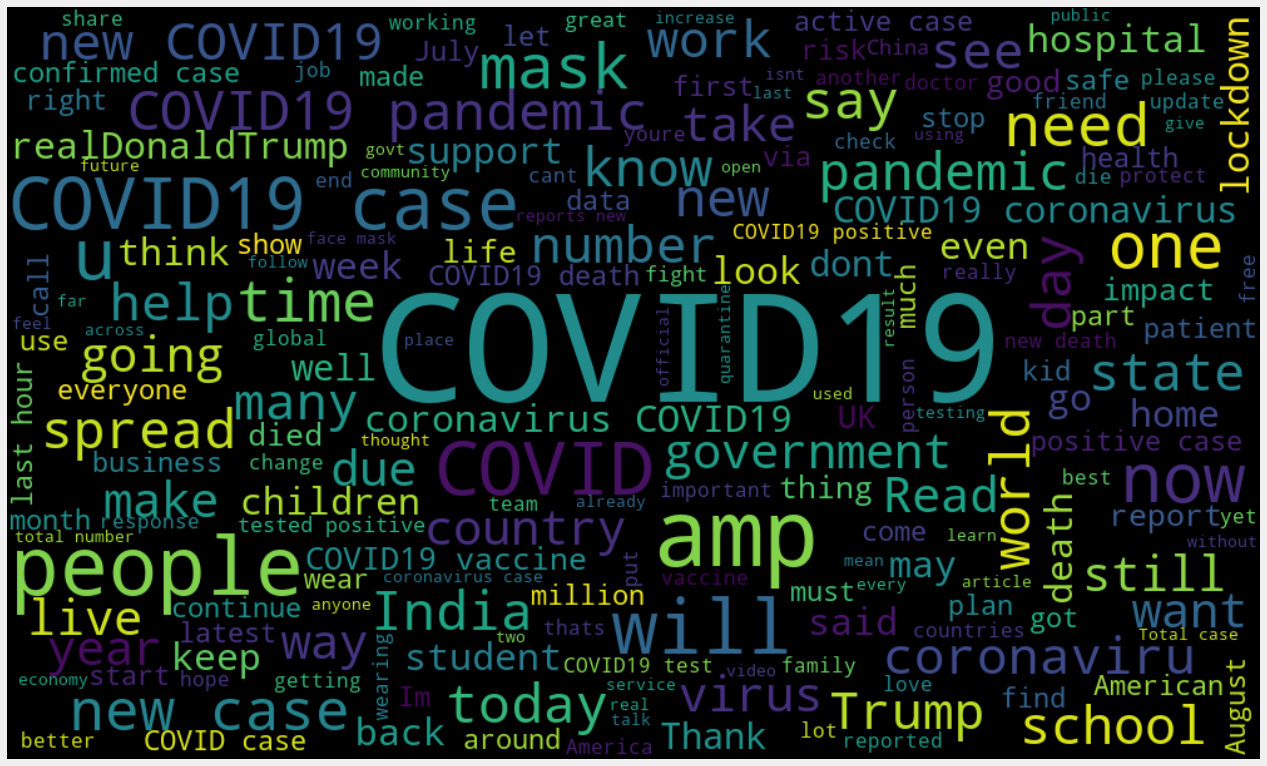

In [24]:
wordClouder(our_data['text'])

user_followers  user_friends  user_favourites  user_verified  \
date                                                                       
2020-07-24         6921791        750145          5287795             14   
2020-07-25      2077487544      35028337        238937050           2236   
2020-07-26      1108272603      16392694        109772417           1068   
2020-07-27      1091220550      15170996        102734006           1041   
2020-07-28       991369017      14425317        110485833            908   
2020-07-29       134695687       5747900         40303097            335   
2020-07-30        54922705       3790860         34005785            215   
2020-07-31       569040263      17524457        109482922            976   
2020-08-01       588874691      18318094        144991407            790   
2020-08-02       334055861      19527299        138917908            728   
2020-08-04       929731216      13712726        103764408           1043   
2020-08-06       642418147      16313722         95455445           1041   
2020-08-07        63329599       2978578         11596958            153   
2020-08-08       630860539      20191234        114176979            908   
2020-08-09       990344800      13282715        115202576            967   
2020-08-10       232317104       9817615         68114425            615   
2020-08-11      1035312938      12608976         85739258           1036   
2020-08-12       894860925      13036763         76710227           1074   
2020-08-13       882374062      13571110         71488067           1060   
2020-08-14       997223900      16429783        105565405           1100   
2020-08-16       968498862      16274004        114809569            987   
2020-08-17       966745364      13497056         91608377           1120   
2020-08-18       483964644      15698699         94731728            912   
2020-08-22      1431366212      24637423        179277766           1393   
2020-08-29       203000641      12360051         81323165            373   
2020-08-30      1223507877      18927170        142572304           1002   

            tweet_count  
date                     
2020-07-24          295  
2020-07-25        16881  
2020-07-26         7500  
2020-07-27         7500  
2020-07-28         7500  
2020-07-29         2780  
2020-07-30         1980  
2020-07-31         7500  
2020-08-01         7500  
2020-08-02         7500  
2020-08-04         7500  
2020-08-06         7214  
2020-08-07         1060  
2020-08-08         7500  
2020-08-09         7500  
2020-08-10         4891  
2020-08-11         7500  
2020-08-12         7500  
2020-08-13         7500  
2020-08-14         7500  
2020-08-16         7500  
2020-08-17         7500  
2020-08-18         7500  
2020-08-22        11555  
2020-08-29         4077  
2020-08-30         8375

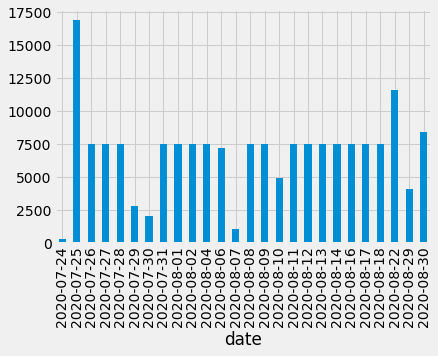

In [25]:
import matplotlib.pyplot as plt

our_data["tweet_count"] = 1

our_data["date"]= pd.to_datetime(our_data["date"])
our_data_byday = our_data.groupby(our_data['date'].dt.to_period('d')).sum()

our_data_byday['tweet_count'].plot(kind = 'bar')
our_data_byday